##House Price Prediction - Advanced regression Assignment
The solution is divided into the following sections:
*  Data understanding and exploration
*  Data cleaning
*  Data preparation
*  Model building and evaluation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install sweetviz

In [ ]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [ ]:
# summary of the dataset: 1460 rows, 81 columns,
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(housing,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Let's take a look at the first few rows
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [ ]:
# Check the dimensions
housing.shape

(1460, 81)

In [ ]:
# Get the description of the dataset
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Checking for percentage nulls
#round(100*(housing.isnull().sum()/len(round(100*(housing.isnull().sum()/len(housing.index)), 2)
#.index)), 2)
pd.set_option('display.max_columns', None)
round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

Checking the correlation between numerical columns

<Axes: >

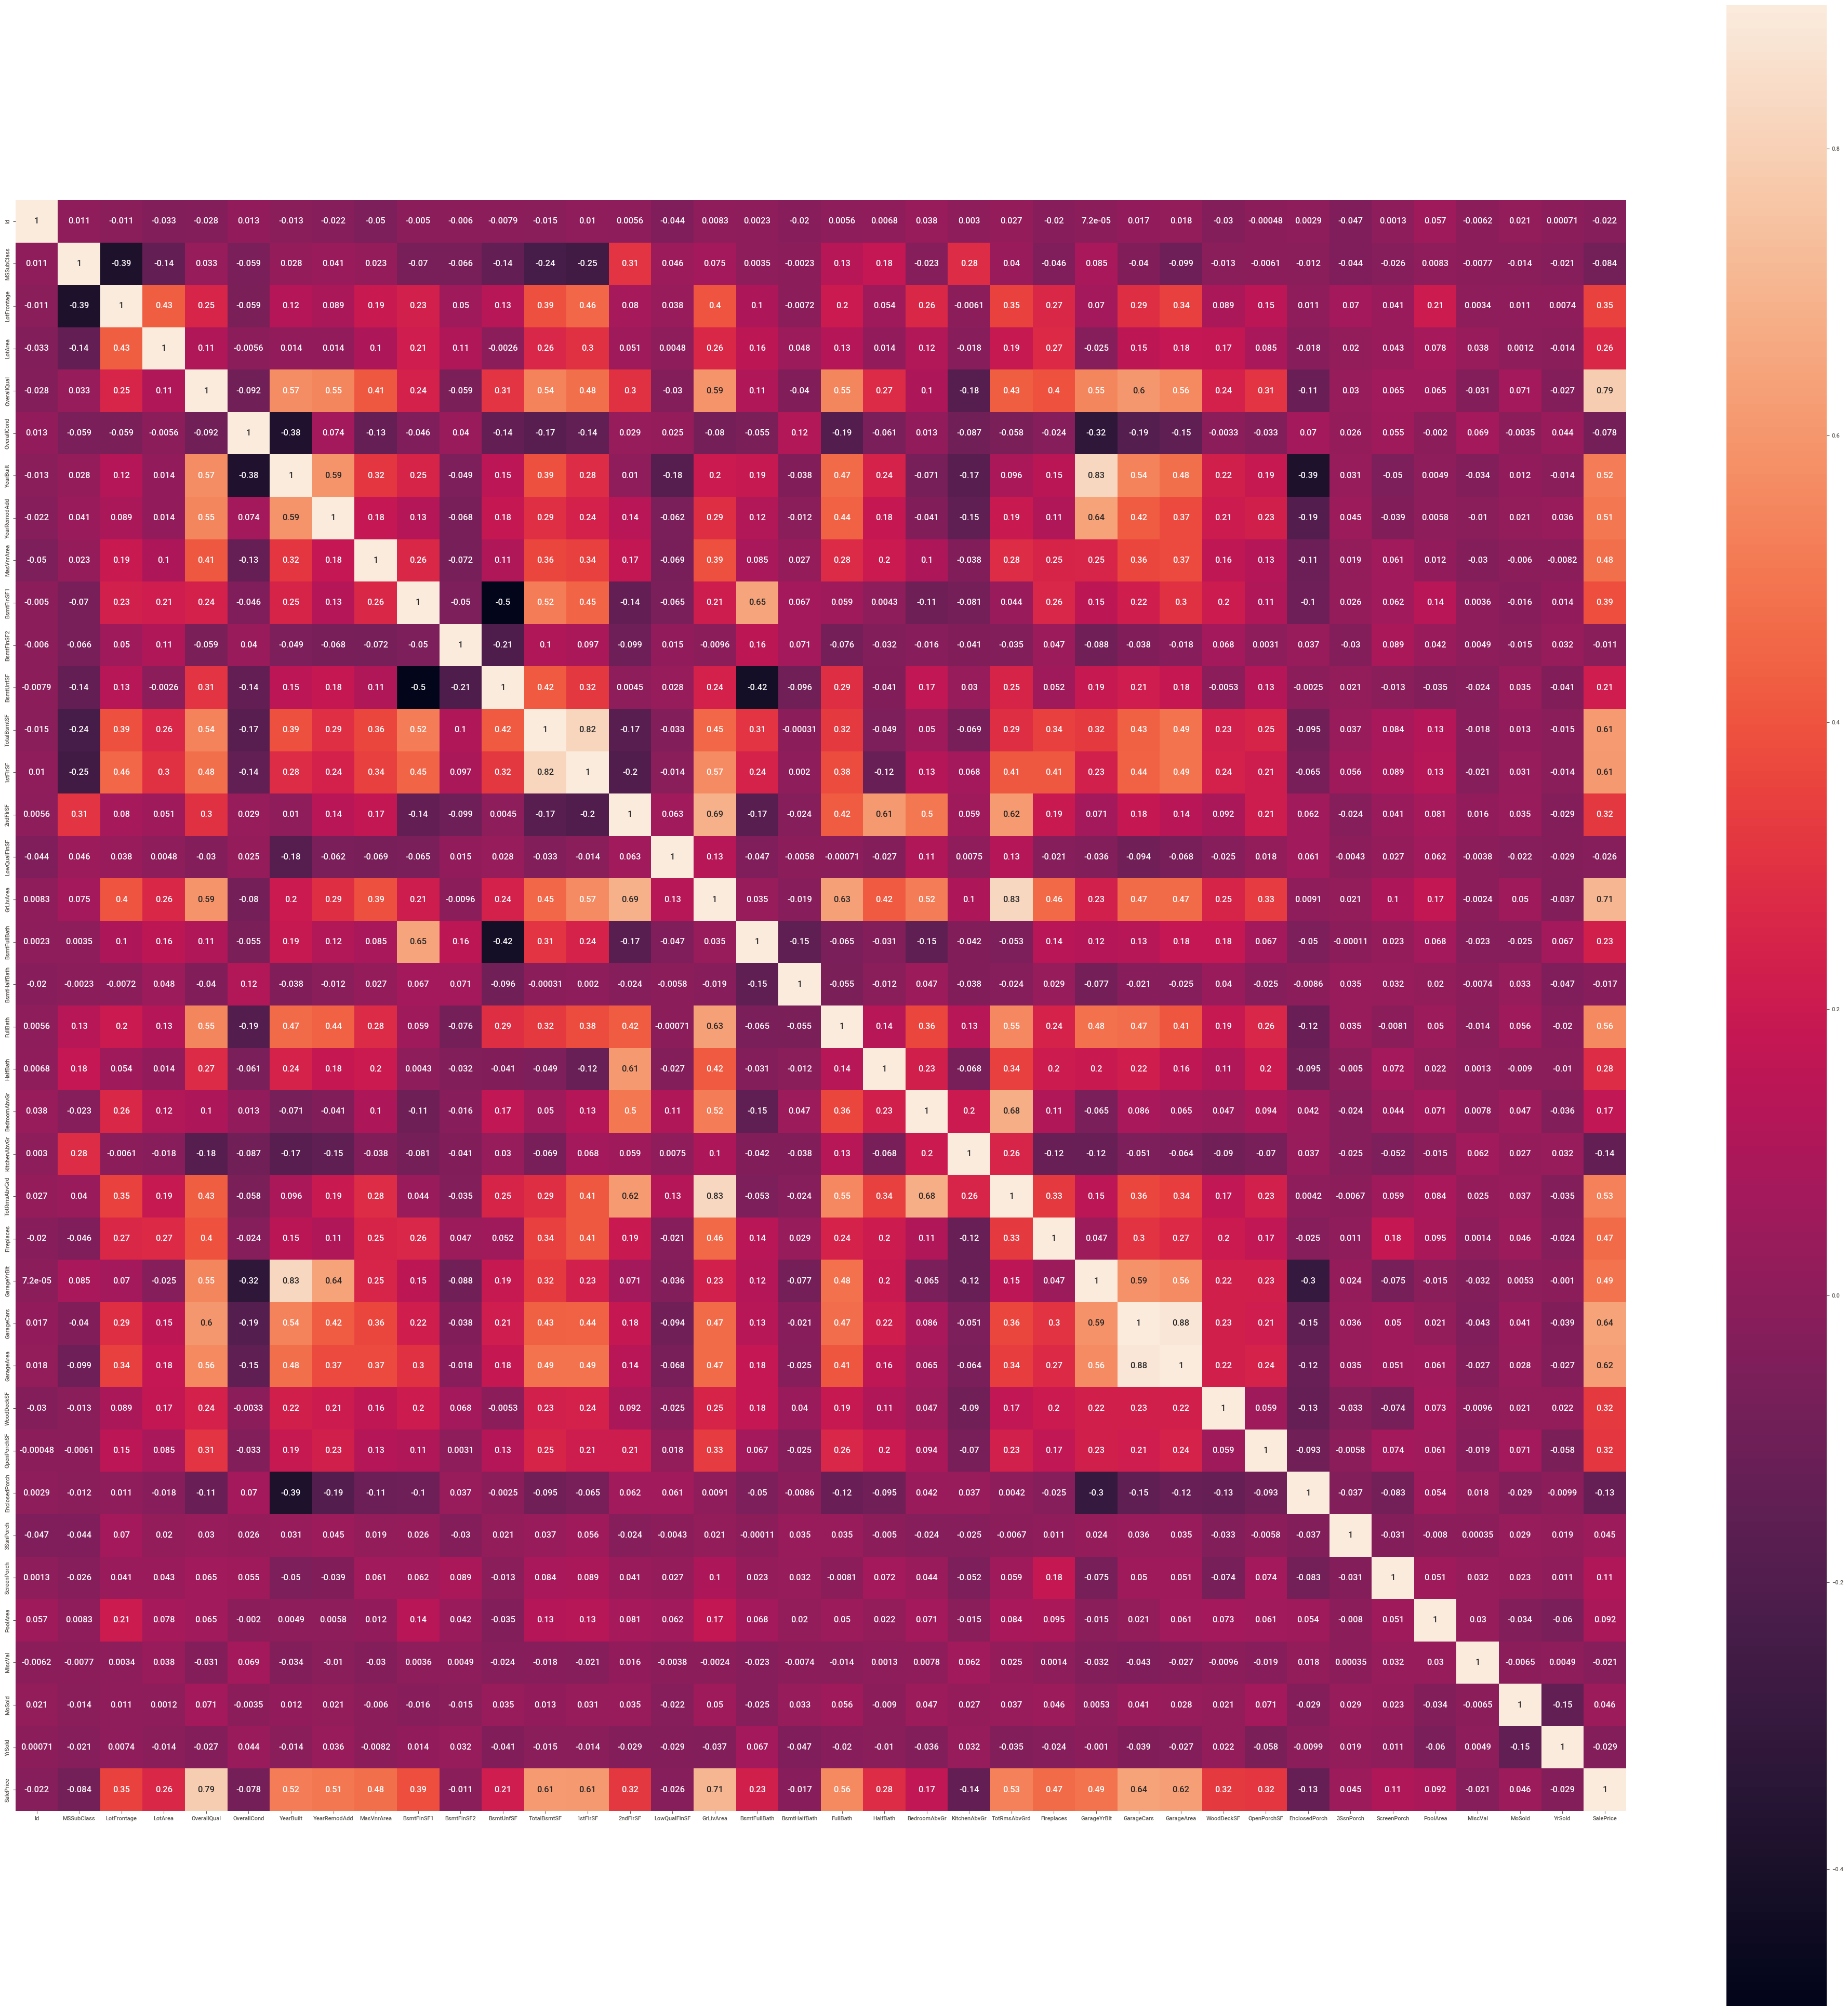

In [ ]:
#Correlation map to see how features are correlated with SalePrice
corrmat = housing.corr()
plt.subplots(figsize=(50,50))
sns.heatmap(corrmat, vmax=0.9, square=True,annot=True)

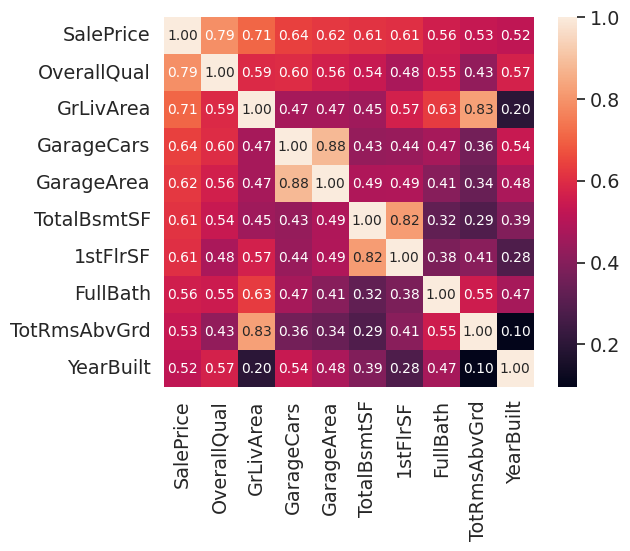

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The heatmap shows some useful insights

Correlation of price with independent variables:

 - Price is highly (positively) correlated with OverallQual,GrLiveArea,YearBuilt,GarageCars,GarageArea,GarageYrBlt,FirePlaces,TotYrAbvGrd,FullBath,GrLivArea,TotalBsmtSF,1stFlrSF etc.

Correlation among independent variables:

Many independent variables are highly correlated : GarageArea,GarageCars,TotalBsmtSF,1stFlrSF etc


Let us plot the graphs between some of these important numerical variables and see if we see any pattern

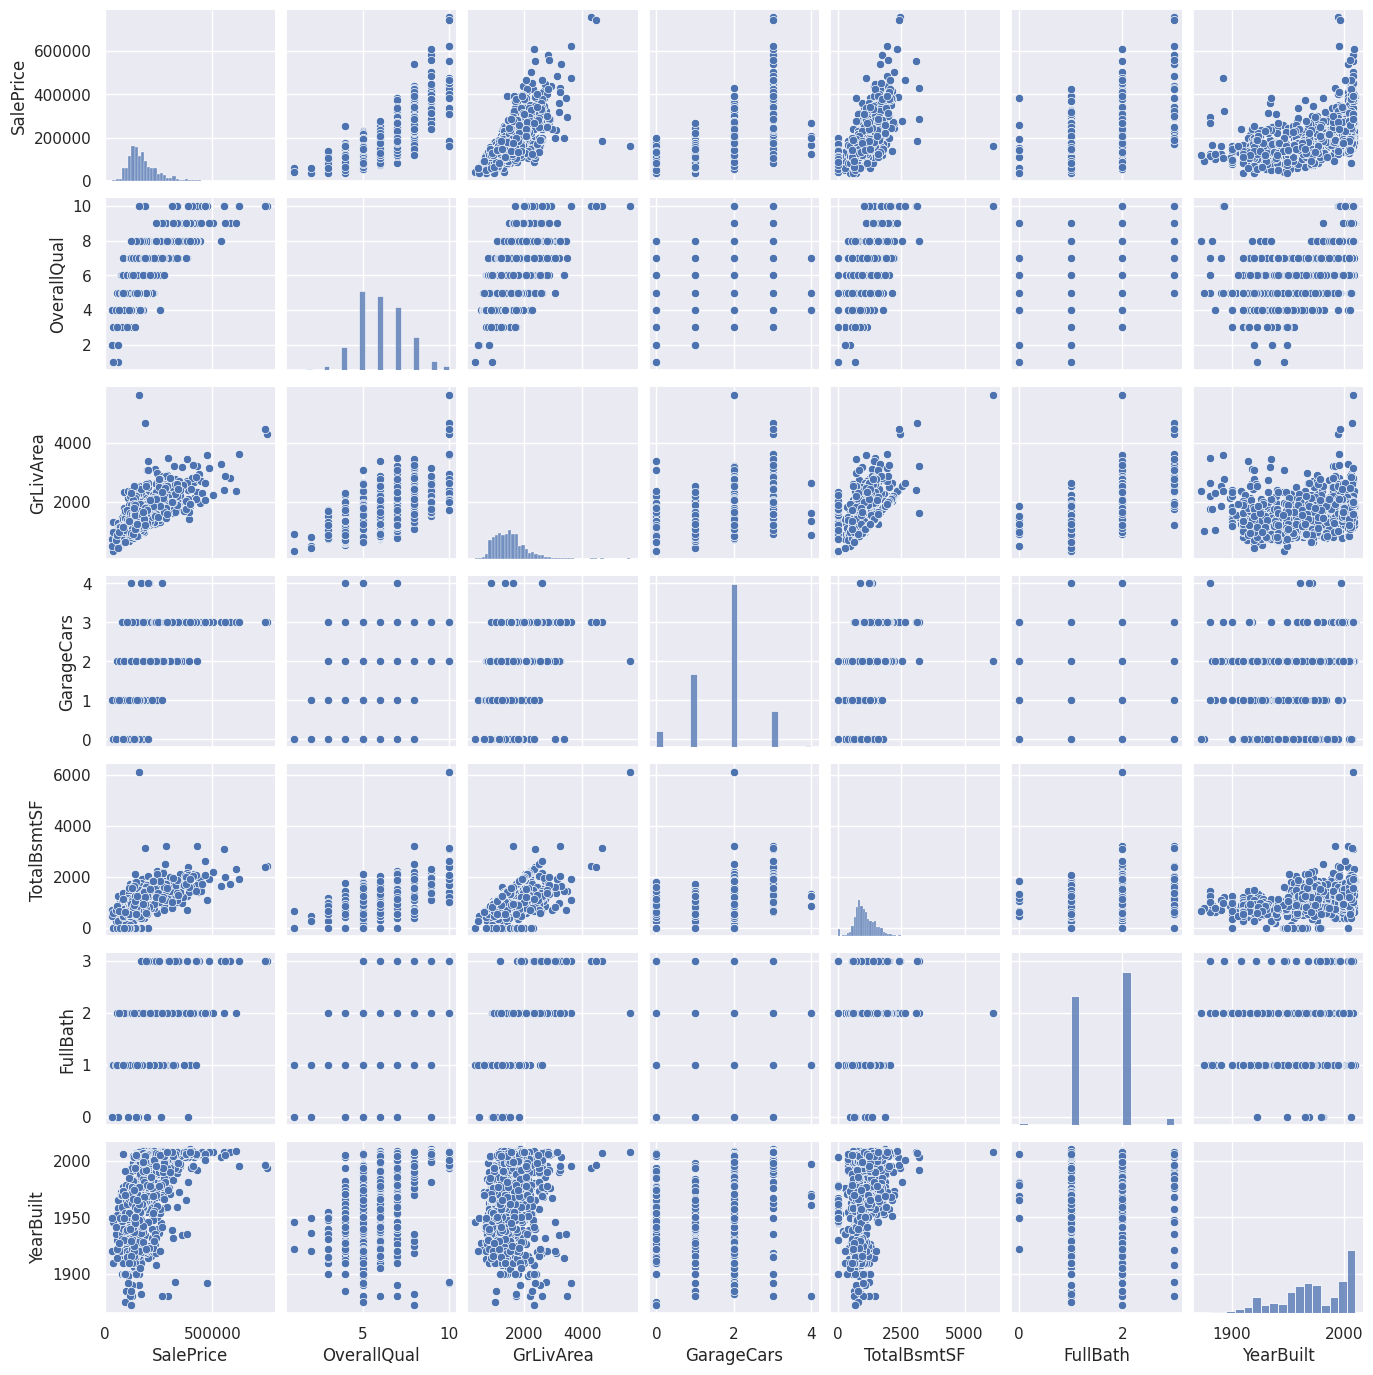

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols],height = 2)
plt.show()

# Missing data
According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
Hence, we will first impute the categorical variables with 'None'

In [ ]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


# Imputing Null Values
With data this large, it is not surprising that there are a lot of missing values in the cells. In order to effectively train our model we build, we must first deal with the missing values. There are missing values for both numerical and categorical data. We will see how to deal with both.

For numerical imputing, we would typically fill the missing values with a measure like median, mean, or mode. For categorical imputing, I chose to fill the missing values with the most common term that appeared from the entire column. There are other ways to do the imputing though, and I ecnourage you to test out your own creative ways!

## Places Where NaN Means Something
If you look at the data description file provided, you will see that for some categories, NaN actually means something. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.

In [ ]:
#you can find these features on the description data file provided

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [ ]:
for i in null_has_meaning:
    housing[i].fillna("None", inplace=True)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Imputing "Real" NaN Values
These are the real NaN values that we have to deal with accordingly because they were not recorded.

In [ ]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
KitchenQual,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000


In [ ]:
# Will check these columns one by one
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
housing['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [ ]:
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [ ]:
housing['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [ ]:
housing['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median.

In [ ]:
housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].median(), inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].median(), inplace=True)
housing["MasVnrType"].fillna("None", inplace=True)

In [ ]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

housing['LotFrontage'] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
CentralAir,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


Now that only one row has a null entry, we will drop the row.

In [ ]:
housing.dropna(inplace=True)

In [ ]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
CentralAir,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [ ]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(housing,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Now we will determine the data type of all features remaining

In [ ]:
#converting from int type to object to treat the variables as categorical variables
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('object')
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('object')
housing['FullBath'] = housing['FullBath'].astype('object')
housing['HalfBath'] = housing['HalfBath'].astype('object')
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('object')
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('object')
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].astype('object')
housing['Fireplaces'] = housing['Fireplaces'].astype('object')
housing['GarageCars'] = housing['GarageCars'].astype('object')

In [ ]:
types_train = housing.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [ ]:
types_train = housing.dtypes
print(types_train)

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [ ]:
pd.DataFrame(types_train).value_counts()

object     55
int64      23
float64     3
dtype: int64

In [ ]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)
print(numerical_values_train)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


These are all the numerical features in our data.

In [ ]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


These are all the caregorical features in our data.

Some EDA on the cleaned data

In [ ]:
data_numeric = housing.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
data_numeric.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Ok, now that we have dealt with all the missing values, it looks like it's time for some feature engineering, the second part of our data preprocessing. We need to create feature vectors in order to get the data ready to be fed into our model as training data. This requires us to convert the categorical values into representative numbers.

<Axes: xlabel='SalePrice', ylabel='Density'>

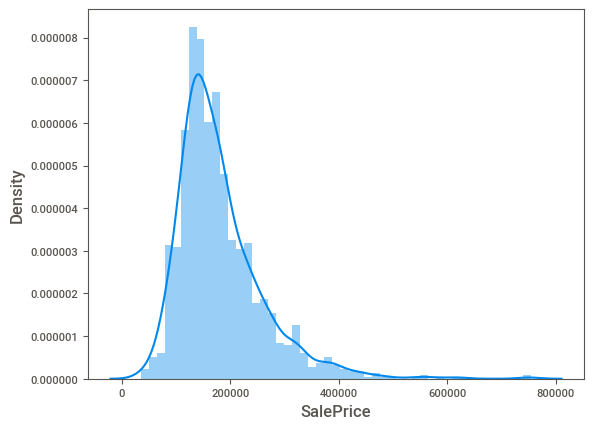

In [ ]:
sns.distplot(housing["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

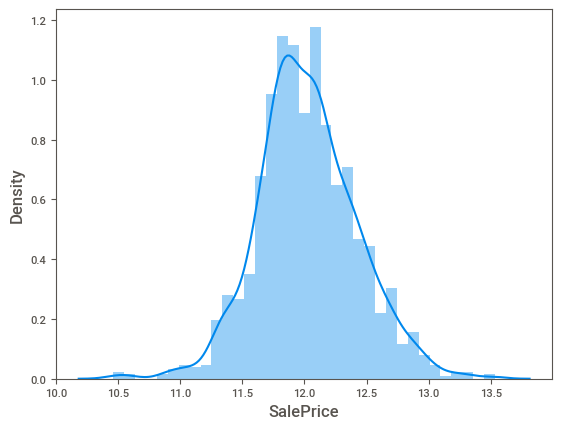

In [ ]:
sns.distplot(np.log(housing["SalePrice"]))

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

In [ ]:
housing["TransformedPrice"] = np.log(housing["SalePrice"])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

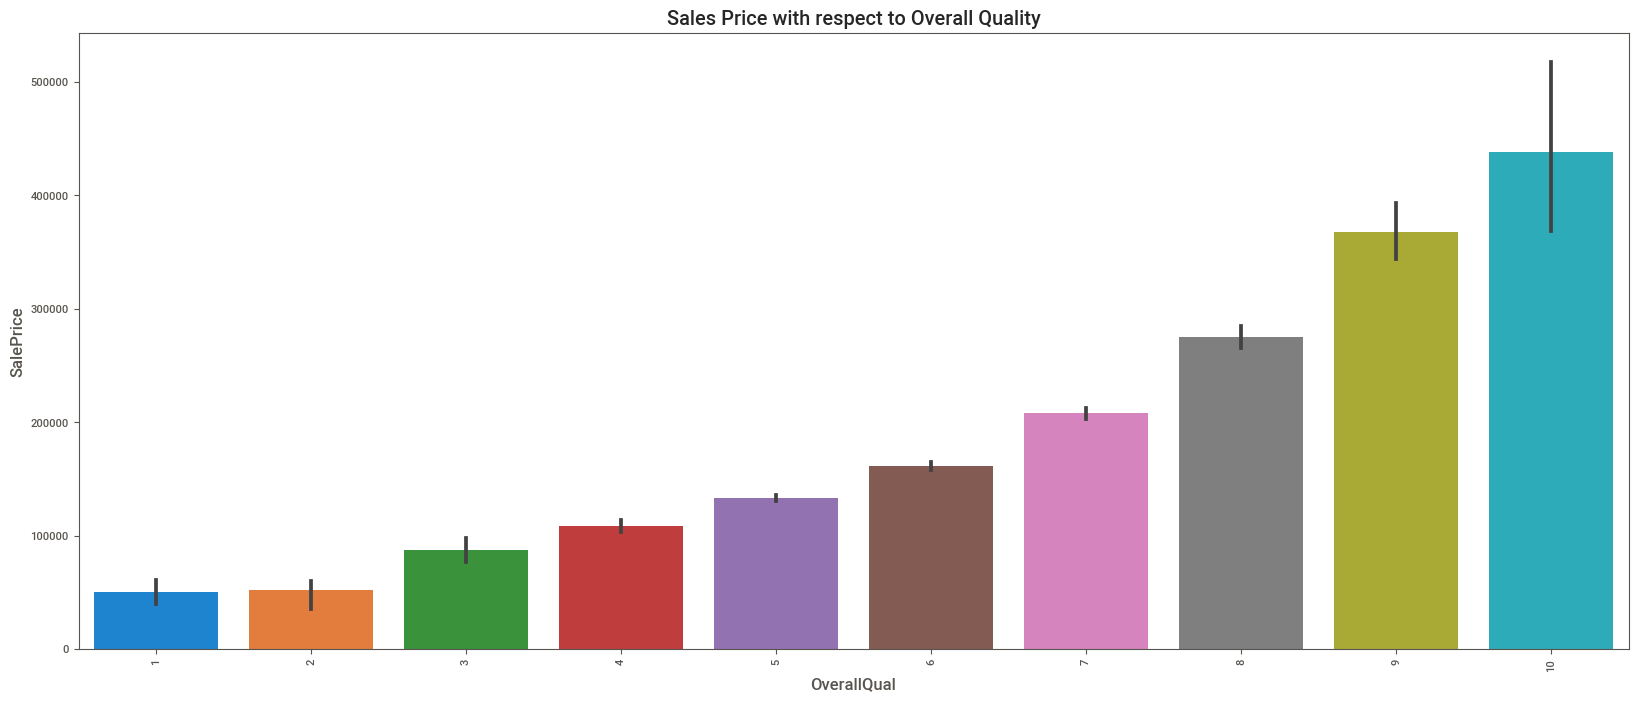

In [ ]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housing)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

Increase on the overall quality has a positive effect on the salesprice.Variance in price increases with increase in Overall quality.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

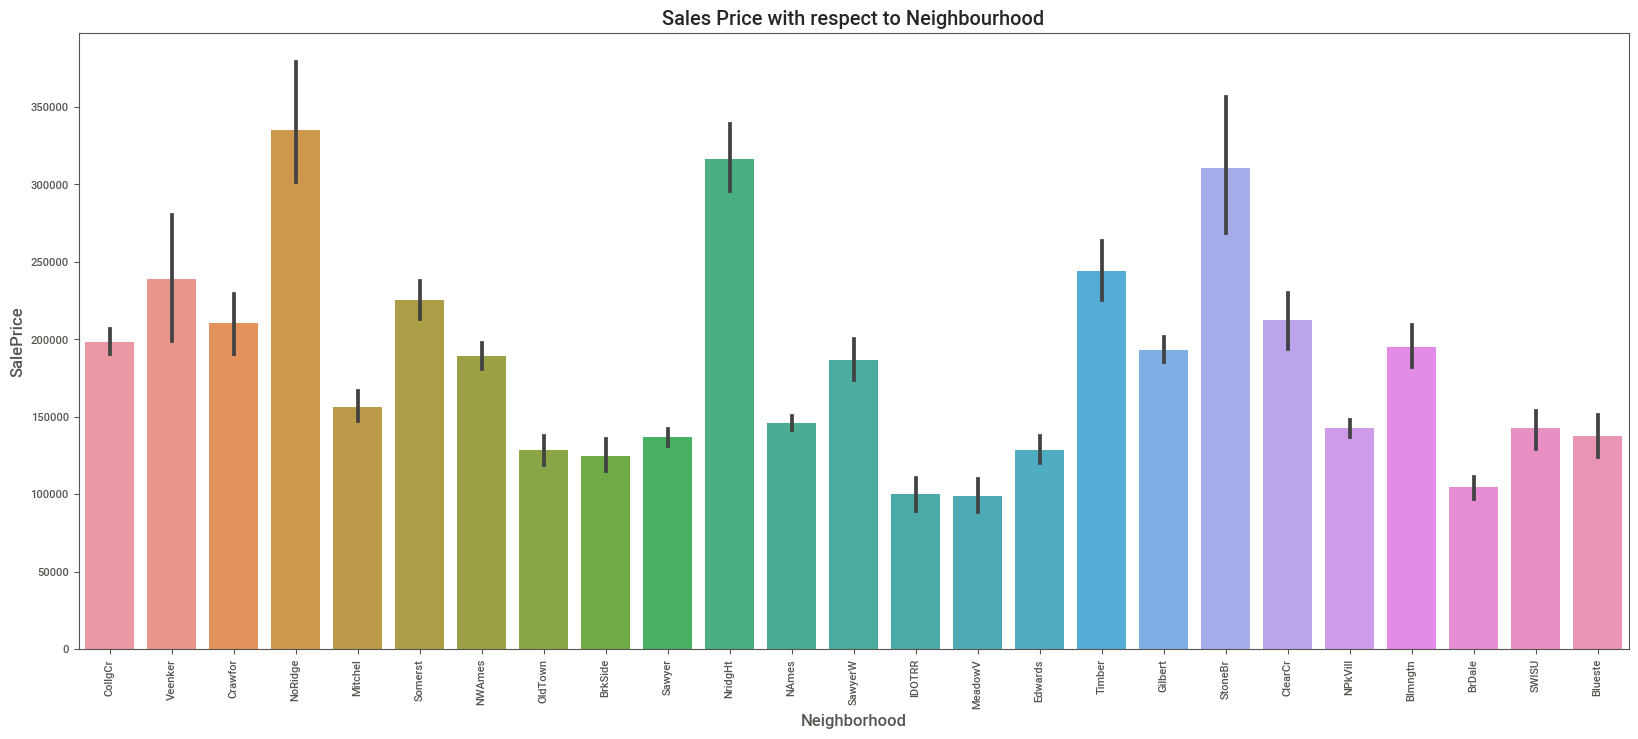

In [ ]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

Houses in some of the neighborhoods have high price

## Data Preparation
Let's now prepare the data and build the model.

Creating dummy columns to convert categorical into numerical


In [ ]:
# for i in categorical_values_train:
#     feature_set = set(housing[i])
#     for j in feature_set:
#         feature_list = list(feature_set)
#         housing.loc[housing[i] == j, i] = feature_list.index(j)

In [ ]:
X = housing.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
y = housing["TransformedPrice"]

In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,None,None,None,WD,Normal


In [ ]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

In [ ]:
# drop categorical variables
final = X.drop(list(house_categorical.columns), axis=1)
final.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,0,12,2008


In [ ]:
# concat dummy variables with X
X = pd.concat([final, house_dummies], axis=1)
X.shape

(1459, 316)

In [ ]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,12.429216


Great! It seems like we have changed all the categorical strings into a numerical. We are ready to build our models!

## Model Building
Now that we've preprocessed and explored our data, we have a much better understanding of the type of data that we're dealing with. Now, we can began to build and test different models for regression to predict the Sale Price of each house.

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [ ]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1021, 316)
(1021,)


In [ ]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(438, 316)
(438,)


In [ ]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Linear Regression

Let's now try predicting house prices using linear regression.

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9590353136301707
Testing R2
-2.4455733158225062e+17


In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9590353136301707
-2.4455733158225062e+17
6.832953473458569
1.6121993616501594e+19
0.0066924128045627515
3.680820460388492e+16


Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [ ]:
## Define a function for checking metrics
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    '''
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)

    Returns a list containing all the above 8 metrics

    '''

    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []

    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))

    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)


    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)



    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train)
    print("RMSE (Test) =", '%.2f' % rmse_test)


    return metric

In [ ]:
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
lr = Lasso(alpha=0.9)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.0
Testing R2
-0.0016561346436727575


In [ ]:
#Generate a list of 50 values between 0 and 1.5
#params = {'alpha': np.linspace(0.2, 0.6 , num = 100) }
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [ ]:
# Applying Lasso

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.176295,0.089780,0.008625,0.001986,0.0001,{'alpha': 0.0001},0.931387,0.855567,0.848425,0.638024,0.912493,0.837179,0.104570,1,0.954400,0.966101,0.964270,0.957700,0.958786,0.960251,0.004319
1,0.099205,0.023087,0.010604,0.003143,0.001,{'alpha': 0.001},0.856086,0.881392,0.831942,0.626230,0.912662,0.821663,0.101324,2,0.911874,0.926691,0.935320,0.931808,0.920021,0.925143,0.008399
2,0.038698,0.003419,0.014725,0.001785,0.01,{'alpha': 0.01},0.825147,0.822926,0.758739,0.474005,0.841988,0.744561,0.138223,3,0.809453,0.810671,0.824030,0.847253,0.800442,0.818370,0.016288
3,0.017530,0.005623,0.008751,0.004142,0.05,{'alpha': 0.05},0.810132,0.752285,0.710658,0.533972,0.760486,0.713507,0.095171,4,0.715143,0.730140,0.746953,0.795021,0.723886,0.742228,0.028375
4,0.037618,0.012891,0.015499,0.002266,0.1,{'alpha': 0.1},0.699440,0.651412,0.624351,0.546988,0.652151,0.634868,0.050151,5,0.626819,0.644298,0.655223,0.704982,0.636916,0.653648,0.027294


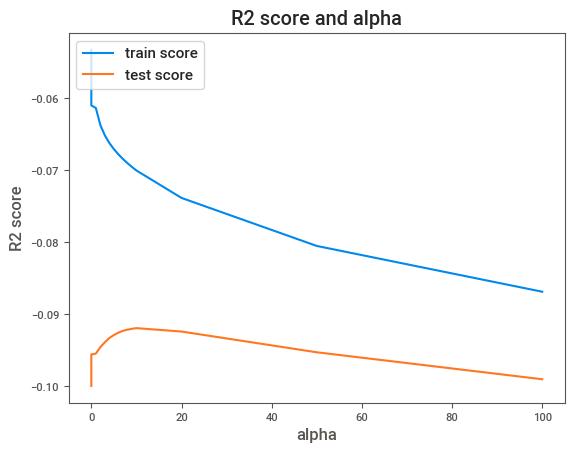

In [ ]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')

plt.title("R2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9163479544444453


In [ ]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8284874690063083


In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9163479544444453
0.8284874690063083
13.953250613965933
11.306649086904802
0.01366625917136722
0.02581426732170046


In [ ]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [ ]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.83
RSS (Train) = 13.95
RSS (Test) = 11.31
MSE (Train) = 0.01
MSE (Test) = 0.03
RMSE (Train) = 0.12
RMSE (Test) = 0.16


In [ ]:
## View the coefficients of lasso fitted model
lasso.coef_

array([-3.72140901e-03,  1.55244267e-02,  5.15295791e-02,  3.69970152e-02,
        3.11509749e-03,  5.91479757e-03,  2.61131913e-03, -0.00000000e+00,
        3.91966901e-02,  0.00000000e+00,  1.01814927e-02, -4.05701663e-03,
        1.26888764e-01, -5.33569493e-03,  3.58919169e-02,  1.32818973e-02,
        2.51477303e-04,  5.50548963e-03,  5.36096283e-03,  9.24125680e-03,
       -2.04886122e-02,  2.07415613e-04, -0.00000000e+00, -4.25997917e-03,
       -6.36453522e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.49831738e-03,  1.81924897e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -6.02670942e-02,
       -0.00000000e+00, -0.00000000e+00,  3.12533746e-02,  0.00000000e+00,
        4.37979492e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.48091934e-03, -0.00000000e+00,
        2.58982525e-02, -

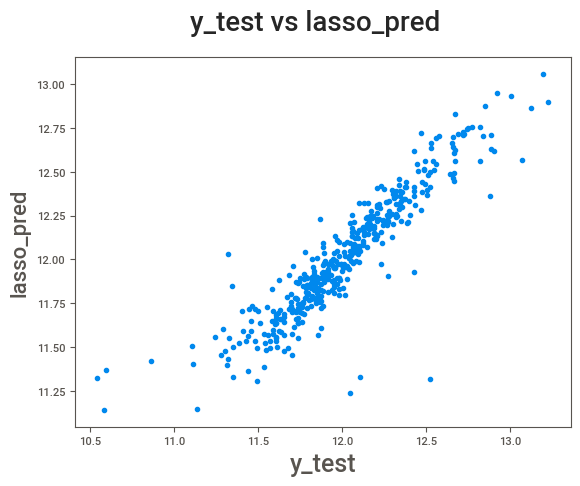

In [ ]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)
plt.show()

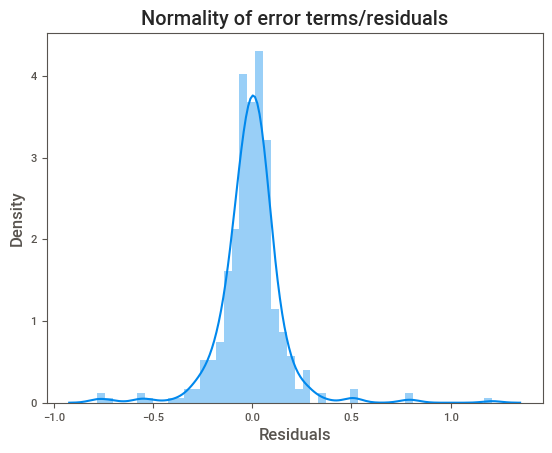

In [ ]:
y_res=y_test-y_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Ridge Regression

In [ ]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027002,0.006636,0.012410,0.006217,0.0,{'alpha': 1e-08},-0.087841,-0.102918,-0.106297,-0.100654,-0.102016,-0.099945,0.006332,30,-0.056678,-0.050812,-0.049467,-0.055818,-0.053522,-0.053259,0.002781
1,0.036522,0.000240,0.013638,0.001463,0.0,{'alpha': 1e-07},-0.087841,-0.102918,-0.106297,-0.100654,-0.102016,-0.099945,0.006332,29,-0.056678,-0.050812,-0.049467,-0.055818,-0.053522,-0.053259,0.002781
2,0.022900,0.006779,0.008142,0.002913,0.000001,{'alpha': 1e-06},-0.087841,-0.102918,-0.106296,-0.100655,-0.102016,-0.099945,0.006332,28,-0.056678,-0.050812,-0.049468,-0.055818,-0.053522,-0.053260,0.002781
3,0.031381,0.006402,0.013329,0.006471,0.00001,{'alpha': 1e-05},-0.087839,-0.102917,-0.106286,-0.100666,-0.102014,-0.099944,0.006331,27,-0.056678,-0.050812,-0.049469,-0.055820,-0.053524,-0.053261,0.002781
4,0.039517,0.003779,0.012861,0.002163,0.0001,{'alpha': 0.0001},-0.087817,-0.102902,-0.106193,-0.100756,-0.102001,-0.099934,0.006321,26,-0.056680,-0.050814,-0.049480,-0.055837,-0.053540,-0.053270,0.002782


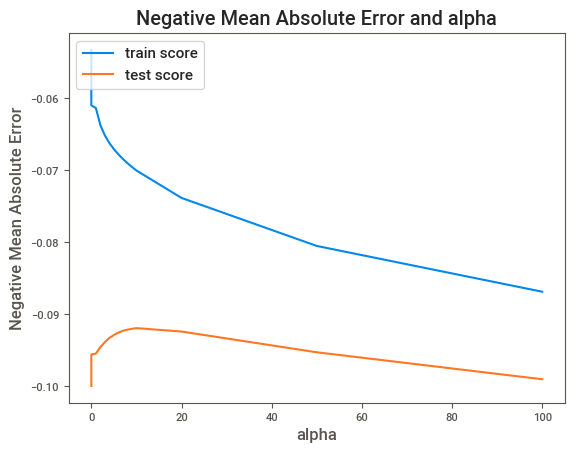

In [ ]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.00643376  0.02027716  0.050378    0.02798415  0.00141228  0.00832412
  0.01099624  0.00054119  0.01298637  0.03419617  0.05878735  0.00316497
  0.07439973 -0.00976424  0.02225314  0.01404916  0.0027884   0.00633631
  0.00798948  0.01159188 -0.02084853  0.00366611 -0.00088949 -0.00409381
 -0.06213631 -0.00589094  0.01639861  0.00075727 -0.03401671  0.03934013
  0.02508653 -0.00136643  0.00712559  0.00688309 -0.00856096 -0.07140561
 -0.02094228 -0.00861622  0.06889497  0.04240504  0.0638369   0.03060969
  0.04340404  0.00470825  0.03501084  0.01189071 -0.03714049  0.00470808
  0.04341815  0.01721737  0.03451471 -0.00898127  0.02714654 -0.02536085
 -0.01869939 -0.0161549   0.00727483 -0.01376998 -0.00264902 -0.01877276
  0.02295582  0.05663736 -0.00742827  0.09198587 -0.0729754  -0.01622638
 -0.07806773 -0.08182215 -0.02454885 -0.0074261   0.00419386 -0.004806
  0.05245708  0.08199523 -0.03262124  0.00889155 -0.02135403 -0.01407486
  0.05202806  0.07273403 -0.01422454  0.02502079 -0.0

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.930830571599227
0.8603968587859733
11.537534592143277
9.203081080965879
0.01130022976703553
0.021011600641474608


In [ ]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_pred_train, y_test, y_pred_test)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.86
RSS (Train) = 11.54
RSS (Test) = 9.20
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.11
RMSE (Test) = 0.14


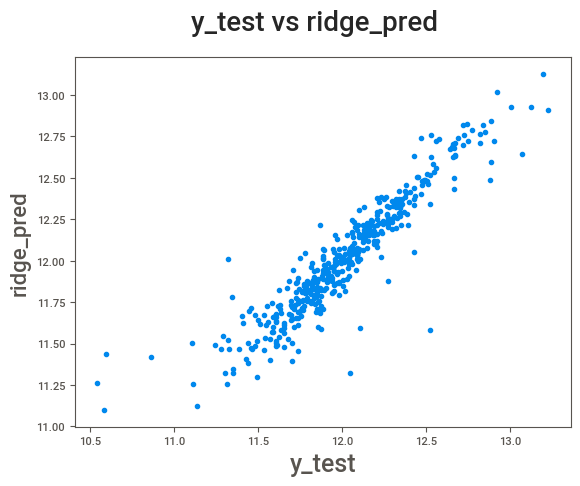

In [ ]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)
plt.show()

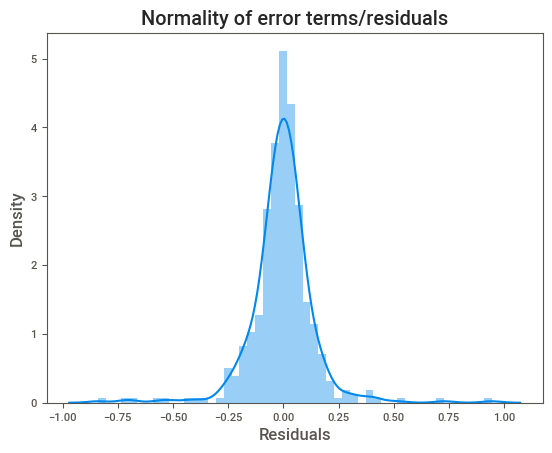

In [ ]:
y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [ ]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.930831,0.916348
R2 Score (Test),0.860397,0.828487
RSS (Train),11.537535,13.953251
RSS (Test),9.203081,11.306649
MSE (Train),0.011300,0.013666
MSE (Test),0.021012,0.025814
RMSE (Train),0.106303,0.116903
RMSE (Test),0.144954,0.160668


Optimal value of lambda for Ridge Regression = 10

Optimal value of lambda for Lasso Regression = 0.001

Lets observe the changes in the coefficients after regularization

In [ ]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [ ]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
##View coefficients
betas

,Ridge,Lasso
LotFrontage,-0.006434,-0.003721
LotArea,0.020277,0.015524
YearBuilt,0.050378,0.051530
YearRemodAdd,0.027984,0.036997
MasVnrArea,0.001412,0.003115
...,...,...
SaleCondition_AdjLand,0.019376,0.000000
SaleCondition_Alloca,0.021382,-0.000000
SaleCondition_Family,0.005551,-0.000000
SaleCondition_Normal,0.040842,0.015968


In [ ]:
## Features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
BsmtUnfSF,0.000541,-0.0
1stFlrSF,0.034196,0.0
MoSold,-0.000889,-0.0
MSSubClass_40,-0.005891,-0.0
MSSubClass_45,0.016399,0.0
...,...,...
SaleType_ConLw,-0.000806,0.0
SaleType_Oth,0.021124,0.0
SaleCondition_AdjLand,0.019376,0.0
SaleCondition_Alloca,0.021382,-0.0


In [ ]:
## Number of features removed by lasso
betas[betas['Lasso']==0].shape

(206, 2)

So 206 features out of 316 have been removed by Lasso.This way lasso regression  performs feature selection

Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple yet robust model.

In [ ]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage             -0.003721
LotArea                  0.015524
YearBuilt                0.051530
YearRemodAdd             0.036997
MasVnrArea               0.003115
                           ...   
Fence_GdWo              -0.004828
SaleType_New             0.031135
SaleType_WD             -0.000796
SaleCondition_Normal     0.015968
SaleCondition_Partial    0.000360
Name: Lasso, Length: 110, dtype: float64

In [ ]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.164201
GrLivArea               0.126889
Neighborhood_Crawfor    0.115195
Neighborhood_NridgHt    0.083074
CentralAir_Y            0.082154
OverallQual_8           0.080601
Exterior1st_BrkFace     0.076328
BsmtExposure_Gd         0.070425
Functional_Typ          0.068475
Neighborhood_Somerst    0.063160
Name: Lasso, dtype: float64

In [ ]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:20]

OverallQual_9           1.148964
GrLivArea               1.148188
Neighborhood_Crawfor    1.095065
CentralAir_Y            1.088095
OverallQual_8           1.074030
Functional_Typ          1.067343
Neighborhood_NridgHt    1.065304
Neighborhood_Somerst    1.060407
MSZoning_RL             1.058982
BsmtExposure_Gd         1.056496
YearBuilt               1.051483
Fireplaces_2            1.050090
Condition1_Norm         1.044926
YearRemodAdd            1.043901
Exterior1st_BrkFace     1.043712
TotalBsmtSF             1.042739
GarageArea              1.041274
Foundation_PConc        1.035766
KitchenAbvGr_1          1.031805
OverallCond_7           1.029124
Name: Lasso, dtype: float64

The variables significant in predicting the price of a house are: -
GrLivArea, OverallQual_9, OverallQual_7, OverallQual_8, Neighborhood_Crawfor,Neighborhood_NridgHt,Functional_Typ, Exterior1st_BrkFace, SaleCondition_Alloca, CentralAir_Y, TotalBsmtSF, Neighborhood_Somerst,BsmtExposure_Gd,YearBuilt, Condition1_Norm etc

GrLivArea:an increase of 1 square foot of house area above ground, the price will increase by 1.13 times

OverallQual_9 & OverallQual_8: if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.08 to 1.17 times

Neighborhood_Crawfor: if Crawford is a nearby location, then the price of house will increase by 1.12 times

Functional_Typ: if the home functionality is typical, then the price of house will increase by 1.07 times

Exterior1st_BrkFace: if the exterior covering on the house is Brick Face, the price of house will increase by 1.07 times.

# Assignment Part-II

The following questions are the second part of the graded assignment. Please submit the answers in one PDF file. For writing normal text, please use MS Word (or similar software that can convert documents to PDF). For equations and figures, you can write/draw them on a blank sheet of paper using a pen, click images and upload them in the same Word document.

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Answer :

As mentioned earlier Optimal value of lambda for Ridge Regression = 10

Optimal value of lambda for Lasso Regression = 0.001

In [ ]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.86
RSS (Train) = 13.05
RSS (Test) = 9.55
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.11
RMSE (Test) = 0.15


In [ ]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.89
R-Squared (Test) = 0.83
RSS (Train) = 18.40
RSS (Test) = 11.21
MSE (Train) = 0.02
MSE (Test) = 0.03
RMSE (Train) = 0.13
RMSE (Test) = 0.16


In [ ]:
## Create a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.921793,0.889703
R2 Score (Test),0.855116,0.829985
RSS (Train),13.045063,18.397617
RSS (Test),9.551199,11.207900
MSE (Train),0.012777,0.018019
MSE (Test),0.021806,0.025589
RMSE (Train),0.113034,0.134236
RMSE (Test),0.147670,0.159965


Ridge Regression Metrics

R2 score of train data set decreased from 0.93 to 0.92

R2 score of test data set decreased from 0.86 to 0.85

Lasso Regression Metrics

R2 score of train data set decreased from 0.91 to 0.88

R2 score of test data set remain same at 0.82

In [ ]:
## Lets see the changes in coefficients after doubling alpha value

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas


""
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [ ]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
## View the coefficients
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso
LotFrontage,-0.005899,-0.000000e+00
LotArea,0.019988,1.579401e-02
YearBuilt,0.047571,5.020154e-02
YearRemodAdd,0.032534,4.296503e-02
MasVnrArea,0.002946,2.865280e-03
BsmtFinSF1,0.010780,2.700307e-03
BsmtFinSF2,0.010424,0.000000e+00
BsmtUnfSF,0.003130,-0.000000e+00
TotalBsmtSF,0.017765,4.185046e-02
1stFlrSF,0.035452,0.000000e+00


In [ ]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.097692
Neighborhood_Crawfor    1.078535
GrLivArea               1.075574
Neighborhood_NridgHt    1.071577
CentralAir_Y            1.069620
Exterior1st_BrkFace     1.063112
Fireplaces_2            1.060857
Functional_Typ          1.059025
2ndFlrSF                1.057454
OverallQual_8           1.055772
Name: Ridge, dtype: float64

In [ ]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]


OverallQual_9           1.148964
GrLivArea               1.148188
Neighborhood_Crawfor    1.095065
CentralAir_Y            1.088095
OverallQual_8           1.074030
Functional_Typ          1.067343
Neighborhood_NridgHt    1.065304
Neighborhood_Somerst    1.060407
MSZoning_RL             1.058982
BsmtExposure_Gd         1.056496
Name: Lasso, dtype: float64

Some of the important predictor variables after we double the alpha values are:-


*   GrLivArea
*   OverallQual_8
*   OverallQual_9
*   Functional_Typ
*   Neighborhood_Crawfor
*   Neighborhood_NridgHt
*   Neighborhood_Somerst
*  CentralAir_Y




Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Answer

We will choose lasso regression as it also act as method of feature selection

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Answer:

Lets drop the top 5 features in Lasso model and build the model again.
Top 5 predictors were

OverallQual_9,GrLivArea,Neighborhood_Crawfor,
CentralAir_Y,OverallQual_8         




        


In [389]:
## drop them from train and test data
X_train2 = X_train.drop(['OverallQual_9','GrLivArea','Neighborhood_Crawfor','CentralAir_Y','OverallQual_8'],axis=1)
X_test2 = X_test.drop(['OverallQual_9','GrLivArea','Neighborhood_Crawfor','CentralAir_Y','OverallQual_8'],axis=1)

In [391]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

modelCV = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)
modelCV.fit(X_train2, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [392]:
## View the optimal value of alpha
modelCV.best_params_

{'alpha': 0.0001}

In [409]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)
# Fit the model on training data
lasso.fit(X_train2, y_train)
## Make predictions
y_train_pred = lasso.predict(X_train2)
y_pred = lasso.predict(X_test2)

In [410]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.81
RSS (Train) = 14.54
RSS (Test) = 12.33
MSE (Train) = 0.01
MSE (Test) = 0.03
RMSE (Train) = 0.12
RMSE (Test) = 0.17


In [395]:
## Lets see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train2.columns
betas

""
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF


In [411]:
## Now fill in the values of betas for lasso coefficients
betas['Lasso'] = lasso.coef_
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF                0.119660
Neighborhood_NridgHt    0.102167
1stFlrSF                0.098721
Exterior1st_BrkFace     0.091417
Neighborhood_Somerst    0.076069
Name: Lasso, dtype: float64

Below are the five most important predictor variables now
*  2ndFlrSF
*  Neighborhood_NridgHt
*  1stFlrSF
*  Exterior1st_BrkFace
*  Neighborhood_Somerst







Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Answer:

Ensuring that a machine learning model is robust and generalizable is crucial to its performance and applicability. Robustness refers to the model's ability to perform consistently in various real-world conditions, while generalizability refers to its ability to perform well on unseen data. Here are some strategies to make sure a model is robust and generalizable:

Quality Data Collection: Start with high-quality and diverse data. Ensure that the training dataset is representative of the real-world scenarios the model will encounter.

Data Preprocessing: Carefully preprocess and clean the data. This may involve handling missing values, removing outliers, and scaling the features.

Feature Engineering: Select or engineer features that are most relevant to the problem at hand.

Cross-Validation: Use techniques like k-fold cross-validation to evaluate the model's performance on multiple subsets of the data. This helps in estimating the model's generalization performance and identifying potential overfitting.

Regularization: Apply Ridge/Lasso regression to prevent overfitting. Regularization encourages the model to have simpler, more generalizable representations.

Model Selection: Experiment with different algorithms and model architectures.

Hyperparameter Tuning: Tune the model's hyperparameters to find the right balance between underfitting and overfitting. Grid search or random search can help in this process.

Data Augmentation: For image or text data, data augmentation techniques can be used to increase the diversity of the training data, making the model more robust.

Transfer Learning: If applicable, leverage pre-trained models and fine-tune them for your specific task. Transfer learning can significantly improve generalization.

Testing on Unseen Data: Finally, evaluate the model's performance on a separate test set that it has not seen during training. This is a critical step to assess how well the model generalizes to new data.

The implications of these strategies for the accuracy of the model are as follows:

Balancing Robustness and Accuracy: Improving robustness may come at the cost of a slight decrease in accuracy on the training data. This trade-off is necessary to ensure the model doesn't overfit and can handle unseen data effectively.

Generalization Accuracy: The ultimate goal is not just high accuracy on the training data but also strong performance on unseen data. If a model is too optimized for the training data, it may not generalize well to new data, resulting in poor accuracy in real-world scenarios.

Validation and Testing: The model's accuracy on validation and test data is a better measure of its true performance, as opposed to the training data. These metrics provide insights into how well the model generalizes, which is often more important than achieving high accuracy on the training set.

In summary, the key to building a robust and generalizable model is striking a balance between accuracy on the training data and the ability to perform well in real-world situations. It's crucial to evaluate a model's performance on unseen data to ensure that it can handle the variability and noise present in the real world.